In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import shutil
from google.colab import files

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from numpy.ma.core import ceil
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
import matplotlib.colors as colors
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, GlobalMaxPooling2D, Dense, Flatten, Dropout, MaxPooling2D, LSTM, Lambda, Conv1D, GlobalMaxPooling1D
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import to_categorical


In [ ]:
pressure_path = "/content/drive/MyDrive/First2YearRawAndNormData/CESMZ200/MinMaxNormWithLabel"
CL_path = pressure_path + "/CL"
COH_path = pressure_path + "/COH"
COL_path = pressure_path + "/COL"
NROI_path = pressure_path + "/NROI"

In [ ]:
CL_files = [f for f in os.listdir(CL_path) if f.endswith('.csv')]
COH_files = [f for f in os.listdir(COH_path) if f.endswith('.csv')]
COL_files = [f for f in os.listdir(COL_path) if f.endswith('.csv')]
NROI_files = [f for f in os.listdir(NROI_path) if f.endswith('.csv')]


In [ ]:
array = []
for file in CL_files:
    dataframe = pd.read_csv(os.path.join(CL_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    name = os.path.splitext(file)[0]
    part = name.split("_")
    day = int(part[0][3:])
    dataframe = np.append(dataframe, day)
    array.append(dataframe)

for file in COH_files:
    dataframe = pd.read_csv(os.path.join(COH_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    name = os.path.splitext(file)[0]
    part = name.split("_")
    day = int(part[0][3:])
    dataframe = np.append(dataframe, day)
    array.append(dataframe)

for file in COL_files:
    dataframe = pd.read_csv(os.path.join(COL_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    name = os.path.splitext(file)[0]
    part = name.split("_")
    day = int(part[0][3:])
    dataframe = np.append(dataframe, day)
    array.append(dataframe)

for file in NROI_files:
    dataframe = pd.read_csv(os.path.join(NROI_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    name = os.path.splitext(file)[0]
    part = name.split("_")
    day = int(part[0][3:])
    dataframe = np.append(dataframe, day)
    array.append(dataframe)


In [ ]:
pressure_df = array
pressure_df = pd.DataFrame(pressure_df)
pressure_df.info()
Y = []
for i in range(len(CL_files)):
  Y.append(0)

for i in range(len(COH_files)):
  Y.append(1)

for i in range(len(COL_files)):
  Y.append(2)

for i in range(len(NROI_files)):
  Y.append(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Columns: 226 entries, 0 to 225
dtypes: float64(226)
memory usage: 1.3 MB


In [ ]:
pressure_df["Class"] = Y
pressure_df.rename(columns = {225: "Day"}, inplace = True)
pressure_df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,Day,Class
0,0.475692,0.473846,0.471385,0.468923,0.465846,0.462769,0.460308,0.456615,0.453538,0.450462,...,0.424000,0.422769,0.422154,0.423385,0.425846,0.429538,0.435077,0.443077,116.0,0
1,0.464615,0.463385,0.462769,0.460923,0.460308,0.457846,0.455385,0.452923,0.451077,0.450462,...,0.418462,0.412923,0.411077,0.414769,0.424000,0.437538,0.454769,0.475077,125.0,0
2,0.248615,0.243692,0.240000,0.237538,0.235692,0.234462,0.234462,0.235692,0.237538,0.240615,...,0.220308,0.216000,0.214154,0.216615,0.222769,0.232615,0.246154,0.264615,120.0,0
3,0.552000,0.544000,0.536615,0.529846,0.524923,0.521846,0.520000,0.519385,0.520615,0.523077,...,0.451077,0.444923,0.443077,0.444923,0.451077,0.461538,0.475077,0.492923,127.0,0
4,0.248615,0.243692,0.240000,0.237538,0.235692,0.234462,0.234462,0.235692,0.237538,0.240615,...,0.220308,0.216000,0.214154,0.216615,0.222769,0.232615,0.246154,0.264615,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.865846,0.877538,0.886769,0.896615,0.904615,0.910769,0.917538,0.920615,0.923692,0.926769,...,0.929231,0.930462,0.928000,0.924923,0.928615,0.932308,0.934769,0.936000,634.0,3
733,0.912615,0.915692,0.923692,0.929846,0.932308,0.935385,0.936615,0.937231,0.937231,0.936615,...,0.934769,0.932923,0.929846,0.927385,0.926154,0.926769,0.927385,0.928615,643.0,3
734,0.946462,0.944615,0.944615,0.942154,0.938462,0.932308,0.929231,0.933538,0.936615,0.936000,...,0.932308,0.929231,0.932923,0.932308,0.933538,0.933538,0.936000,0.939077,620.0,3
735,0.856000,0.864000,0.874462,0.876923,0.873846,0.864000,0.868923,0.872615,0.880615,0.889846,...,0.936615,0.937231,0.937846,0.936615,0.935385,0.933538,0.931077,0.927385,694.0,3


In [ ]:
train_data = pressure_df[pressure_df["Day"] <= 365]
test_data = pressure_df[pressure_df["Day"] > 365]

In [ ]:
X_train = train_data.drop(columns = ["Day", "Class"])
Y_train = train_data["Class"]

X_test = test_data.drop(columns = ["Day", "Class"])
Y_test = test_data["Class"]

# **SOM**

In [ ]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range


In [ ]:
num_rows = 15
num_cols = 15
max_m_dsitance = 7
max_learning_rate = 0.75
max_steps = 20000

In [ ]:
#main function

train_x_norm = minmax_scaler(X_train) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
#np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
SOM training completed


In [ ]:
label_data = np.array(Y_train)
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

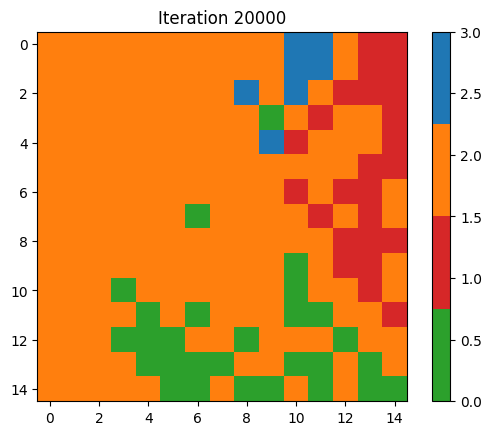

In [ ]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:blue'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:

# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(X_test) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(Y_test, np.array(winner_labels)))

Accuracy:  0.7048780487804878


# **CNN**

In [ ]:
#Reshape training and testing data
train_X = X_train.to_numpy().reshape(X_train.shape[0],15,15,1).astype("float32")

train_Y = Y_train.to_numpy()

test_X = X_test.to_numpy().reshape(X_test.shape[0],15,15,1).astype("float32")

test_Y = Y_test.to_numpy()

train_Y = to_categorical(train_Y, num_classes=4)
test_Y = to_categorical(test_Y, num_classes=4)

print(train_X.shape)

(327, 15, 15, 1)


In [ ]:
#Define the model architecture
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, activation = "relu", input_shape = (15, 15, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

In [ ]:
# # Define the model architecture
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 15)))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=50)
tensorboard_callback = TensorBoard(log_dir="./logs")

# Fit the model
model.fit(train_X, train_Y, epochs=1000, batch_size=16, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/1000
21/21 [==============================] - 2s 14ms/step - loss: 1.3471 - accuracy: 0.4220
Epoch 2/1000
21/21 [==============================] - 0s 14ms/step - loss: 1.2749 - accuracy: 0.4312
Epoch 3/1000
21/21 [==============================] - 0s 10ms/step - loss: 1.2106 - accuracy: 0.5199
Epoch 4/1000
21/21 [==============================] - 0s 9ms/step - loss: 1.0709 - accuracy: 0.5902
Epoch 5/1000
21/21 [==============================] - 0s 10ms/step - loss: 0.9241 - accuracy: 0.6330
Epoch 6/1000
21/21 [==============================] - 0s 10ms/step - loss: 0.8333 - accuracy: 0.6514
Epoch 7/1000
21/21 [==============================] - 0s 9ms/step - loss: 0.8437 - accuracy: 0.6575
Epoch 8/1000
21/21 [==============================] - 0s 10ms/step - loss: 0.7996 - accuracy: 0.6606
Epoch 9/1000
21/21 [==============================] - 0s 9ms/step - loss: 0.8354 - accuracy: 0.6300
Epoch 10/1000
21/21 [==============================] - 0s 9ms/step - loss: 0.7816 - accuracy: 

In [ ]:
y_pred = model.predict(test_X).argmax(axis=1)
y_true_value = np.argmax(test_Y, axis = 1) #to change to one dimension

accuracy = accuracy_score(y_true_value, y_pred)
print('Test accuracy:', accuracy)

13/13 [==============================] - 0s 8ms/step
Test accuracy: 0.8097560975609757
